Import Important Library

In [3]:
from statistics import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#ทำการอ่านไฟล์นามสกุล csv ด้วยคำสั่ง to_csv (ถ้าเป็น excel ก็ใช้ to_excel)
data = pd.read_csv("./data.csv")
data

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500009,1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN
1500010,1500010,Australia and Oceania,NaN,Household,Online,L,12/5/2016,937431466,12/8/2016,5657,668.27,502.54,3780403.39,2842868.78,937534.61
1500011,1500011,Central America and the Caribbean,NaN,Household,Offline,C,11/19/2011,274930989,12/13/2011,7044,668.27,502.54,4707293.88,3539891.76,1167402.12
1500012,1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN


In [5]:
#ลบ Columns โดยใช้คำสั่ง .drop และบอกชื่อ Columns ที่ต้องการลบ
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13


In [7]:
#เช็คแค่ Columns
list(data.columns)

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [8]:
#อธิบายภาพรวมของ Data ในเชิงสถิติ โดยใช้คำสั่ง .describe เช่นค่า min, max, mean, Standard error
#ต่อมา ใช้คำสั่ง round() เพื่อปัดทศนิยมให้เหลือ 2 จุดจะได้ดูง่ายขึ้น
data.describe().round(2)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.500014e+06,1500014.00,1500014.00,1500014.00,1500009.00,1500009.00,1.500009e+06
mean,5.500679e+08,4999.30,266.05,187.55,1329889.20,937489.14,5.939205e+07
std,2.599833e+08,2885.55,217.00,175.67,1468814.34,1149109.12,7.144790e+10
min,1.000012e+08,1.00,9.33,6.92,9.33,6.92,2.410000e+00
25%,3.246868e+08,2501.00,81.73,35.84,277718.54,161817.60,9.506640e+04
50%,5.497915e+08,4998.00,154.06,97.44,785329.26,467357.49,2.813704e+05
75%,7.756273e+08,7498.00,421.89,263.33,1821933.36,1196571.52,5.654252e+05
max,9.999999e+08,10000.00,668.27,524.96,6682700.00,5249600.00,8.750000e+13


In [9]:
# คำสั่ง infoเป็นการดูภาพรวมของ data และ จะเห็นข้อมูลที่อยู่ใน columns นั้นๆด้วย
data.info

<bound method DataFrame.info of                                     Region           Country  Item Type  \
0                       Sub-Saharan Africa      South Africa     Fruits   
1                       Sub-Saharan Africa      South Africa     Fruits   
2             Middle East and North Africa           Morocco    Clothes   
3             Middle East and North Africa           Morocco    Clothes   
4                    Australia and Oceania  Papua New Guinea       Meat   
...                                    ...               ...        ...   
1500009                               Asia             India     Snacks   
1500010              Australia and Oceania               NaN  Household   
1500011  Central America and the Caribbean               NaN  Household   
1500012                               Asia            Brunei     Cereal   
1500013       Middle East and North Africa            Israel  Beverages   

        Sales Channel Order Priority  Order Date   Order ID   Ship 

In [10]:
#ลบ County ที่เป็น O ออกไป โดยจะ Filter ข้อมูลที่ Country เป็น 0 ก่อนโดยใช้คำสั่ง .notnull()
data = data[data["Country"].notnull()]

In [11]:
#Rename ชื่อ โดยใช้คำสั่ง .renanme ตามด้วยชื่อ columns ที่ต้องการ
data = data.rename(columns = {"Item Type" : "Item_Type",
                             "Order Date" : "Order_Date"
                             })

In [12]:
list(data.columns)

['Region',
 'Country',
 'Item_Type',
 'Sales Channel',
 'Order Priority',
 'Order_Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [13]:
#ทำการเพิ่ม Columns โดยใช้คำสั่ง ["ชื่อ column ใหม่ที่ต้องการ"] = (ข้อมูลที่จะนำมาใช้เพื่อสร้าง column เพื่อ)
data["%margin"] = ((data["Total Profit"] / data["Total Revenue"]) *100).round(2)

In [14]:
data.head(2)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83


In [15]:
#สร้างเงื่อนไข if เช่นถ้าเกิด Margin ที่คำนวนได้มากกว่า 30 ให้ใช้คำว่า good ถ้าไม่ใช่ ให้ใช้คำว่า bad
#สร้าง Function ในการใช้งานก่อน โดยกำหนดเงื่อนไขดังนี้

def if_condition(row):            #สร้าง Function โดยใช้คำสั่ง def และตั้งชื่อว่า if_condition
    if row["%margin"] > 30:       #กำหนดเงื่อนไขว่า Row %margin ที่สร้าง ถ้า มากกว่า 30
        val = "good"              #ให้ return ค่าออกมาเป็น good
    else:                         #นอกเหนือจากนั้น
        val = "bad"               #ให้เป็น bad
    return val                    #ให้ส่งค่ากลับมา เมื่อมีการเรียกใช้งาน

In [16]:
#ต่อมา สร้าง Columns ใหม่ที่ชื่อว่า "dicision" โดยใช้ function if ที่สร้างเมื่อกี้มาทำ
data["dicision"] = data.apply(if_condition, axis=1) #ในที่นี้ axis = 1 คือ columns 

In [17]:
data.head(2)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad


/Users/kridsadee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


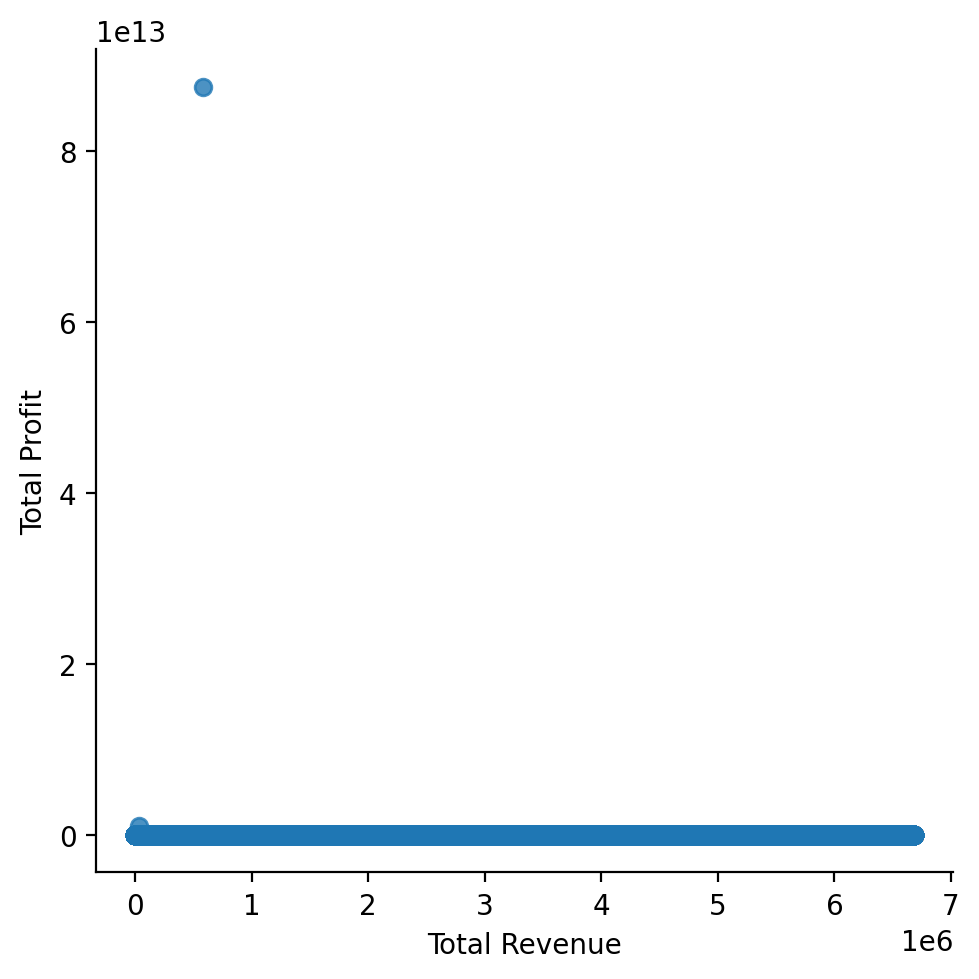

In [18]:
#plot graph scatter plot เพื่อดูการกระจายของข้อมูลกัน โดยจะกำหนดแกน x เป็น 'Total revenue' และแกน y เป็น 'Total'
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data, ci= None)# CI = confident interval หรือช่วงความเชื่อมั่น

In [19]:
#หาสาเหตุ data ดังกล่าวคืออะไร โดยบอกให้โชว์ตัวที่ max ที่สุดมาซึ่งจะเห็นความผิดปกติคือค่ามากสุดของ Total Profit เพราะนี่มันเยอะมากจนติด e หรือ exponatial ที่มี 0 ถึง 6 ตัว
data.loc[data['Total Profit'].idxmax()] 

Region            Sub-Saharan Africa
Country                        Ghana
Item_Type            Office Supplies
Sales Channel                    NaN
Order Priority                     L
Order_Date                 3/23/2017
Order ID                   601245963
Ship Date                  4/15/2017
Units Sold                       896
Unit Price                    651.21
Unit Cost                     524.96
Total Revenue              583484.16
Total Cost                 470364.16
Total Profit        87500000000000.0
%margin           14996122602.540001
dicision                        good
Name: 1500003, dtype: object

In [20]:
#ทดสอบว่ายอดเงินของ Total Profit มันสูงได้ขนาดนี้จริงๆ เลยเรียก Top 10 มาดู
data.sort_values("Total Profit", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1500003,Sub-Saharan Africa,Ghana,Office Supplies,NaN,L,3/23/2017,601245963,4/15/2017,896,651.21,524.96,583484.16,470364.16,8.750000e+13,1.499612e+10,good
1500005,Sub-Saharan Africa,Uganda,Personal Care,Online,M,6/19/2014,539471471,7/21/2014,451,81.73,56.67,36860.23,25558.17,1.000000e+12,2.712951e+09,good
897995,Asia,Maldives,Cosmetics,Online,H,4/12/2016,340228402,5/23/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
942016,Middle East and North Africa,United Arab Emirates,Cosmetics,Offline,L,3/8/2016,829681336,4/11/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
583126,Asia,Maldives,Cosmetics,Online,H,4/11/2016,340228402,5/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1426741,Sub-Saharan Africa,Zambia,Cosmetics,Offline,C,6/30/2016,138959300,7/20/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good


In [21]:
#ลบ rows ดังกล่าวทิ้งโดยใช้คำสั่ง drop เพราะมีค่ามากผิดปกติ
data = data.drop(1500005)
data = data.drop(1500003)

In [22]:
data.sort_values("Total Profit", ascending = False).head(3)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good


In [23]:
#ลองเช็คจากบนลงล่าง
data.sort_values("Total Profit", ascending = True).head(3)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad


In [24]:
#ทดสอบยอดเงินของ Total Revunue  Top 5
data.sort_values("Total Revenue", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
468659,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
142999,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1099878,Europe,Bosnia and Herzegovina,Household,Online,M,6/9/2011,790819776,7/7/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1085903,Europe,Sweden,Household,Offline,C,6/18/2011,668456542,7/31/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
803322,Sub-Saharan Africa,Zimbabwe,Household,Offline,H,7/5/2011,423730075,7/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
727845,Middle East and North Africa,Yemen,Household,Offline,H,3/14/2011,214452111,4/18/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
402635,Sub-Saharan Africa,Cape Verde,Household,Online,M,5/14/2011,257909476,6/19/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1028057,Europe,Armenia,Household,Offline,H,4/26/2011,502635943,5/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
142998,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1399426,Europe,Slovakia,Household,Online,C,5/5/2011,380272710,5/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad


In [25]:
data.sort_values("Total Revenue", ascending = True).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
470541,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
575497,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
575498,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad


In [26]:
#Check %margin ที่คำนวนเมื่อกี้ จะเห็นว่าบรรทัดแรก %margin ไม่ผิดปกติอะไร แต่ยอด Total Revenue - Total Cost มันผิดเพราะ Unit Sold x Unit price หรือ Unit Cost ก็ไม่ถึง 
data.sort_values("%margin", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1092717,Central America and the Caribbean,Antigua and Barbuda,Clothes,Offline,H,12/23/2016,202264583,1/12/2017,3440,109.28,35.84,375923.20,123289.60,252633.60,67.2,good
1244997,Europe,France,Clothes,Offline,C,11/21/2012,334083354,12/10/2012,1543,109.28,35.84,168619.04,55301.12,113317.92,67.2,good
398974,Europe,France,Clothes,Online,M,9/15/2013,835613095,10/14/2013,5339,109.28,35.84,583445.92,191349.76,392096.16,67.2,good
1245020,Sub-Saharan Africa,Eritrea,Clothes,Offline,C,10/31/2015,608909356,11/28/2015,8665,109.28,35.84,946911.20,310553.60,636357.60,67.2,good
158959,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2,good
158960,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2,good
610824,Australia and Oceania,Federated States of Micronesia,Clothes,Online,C,9/21/2016,818090331,10/21/2016,9964,109.28,35.84,1088865.92,357109.76,731756.16,67.2,good
861058,Europe,United Kingdom,Clothes,Online,H,6/11/2016,448429572,7/1/2016,9130,109.28,35.84,997726.40,327219.20,670507.20,67.2,good
861060,Sub-Saharan Africa,Madagascar,Clothes,Online,C,6/6/2015,936628949,7/19/2015,8175,109.28,35.84,893364.00,292992.00,600372.00,67.2,good
1245001,Sub-Saharan Africa,Equatorial Guinea,Clothes,Offline,L,12/18/2011,223178088,12/29/2011,2211,109.28,35.84,241618.08,79242.24,162375.84,67.2,good


In [27]:
data.sort_values("%margin", ascending = True).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
143232,Sub-Saharan Africa,Uganda,Meat,Offline,C,4/10/2013,598110997,5/14/2013,3190,421.89,364.69,1345829.10,1163361.10,182468.0,13.56,bad
831099,Asia,Thailand,Meat,Offline,H,9/13/2015,261373174,9/14/2015,4985,421.89,364.69,2103121.65,1817979.65,285142.0,13.56,bad
556991,Middle East and North Africa,Morocco,Meat,Online,H,10/31/2012,510798871,12/9/2012,5592,421.89,364.69,2359208.88,2039346.48,319862.4,13.56,bad
1151936,Sub-Saharan Africa,Comoros,Meat,Online,C,10/27/2015,775944459,11/19/2015,8063,421.89,364.69,3401699.07,2940495.47,461203.6,13.56,bad
623841,Sub-Saharan Africa,Zimbabwe,Meat,Online,M,4/4/2014,380536210,5/22/2014,7976,421.89,364.69,3364994.64,2908767.44,456227.2,13.56,bad
232678,Europe,Denmark,Meat,Online,C,11/27/2015,505518567,12/5/2015,3033,421.89,364.69,1279592.37,1106104.77,173487.6,13.56,bad
743311,Central America and the Caribbean,Dominica,Meat,Offline,L,4/15/2013,884086835,5/23/2013,9796,421.89,364.69,4132834.44,3572503.24,560331.2,13.56,bad
743303,Central America and the Caribbean,Nicaragua,Meat,Online,H,11/25/2013,309718167,1/7/2014,1343,421.89,364.69,566598.27,489778.67,76819.6,13.56,bad
668415,Europe,Luxembourg,Meat,Online,M,3/21/2017,741202771,3/22/2017,7226,421.89,364.69,3048577.14,2635249.94,413327.2,13.56,bad
272985,Middle East and North Africa,Kuwait,Meat,Offline,H,9/22/2014,974938189,11/8/2014,4730,421.89,364.69,1995539.70,1724983.70,270556.0,13.56,bad


In [28]:
#เรียกข้อมูลจากล่างขึ้นบนดูโดยใช้คำสั่ง .tail จะเห็นว่ามี 5 ตัวล่าง Total Revenue กับ Total Cost ลบกันมันผิด และ Region ก็ Nan เลยจะลบให้หมด
data.tail(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision
1499996,Australia and Oceania,Samoa,Snacks,Offline,M,8/21/2013,346272170,9/11/2013,8485,152.58,97.44,1294641.30,826778.40,467862.90,36.14,good
1499997,Europe,Denmark,Baby Food,Online,L,2/27/2017,458885467,3/23/2017,3262,255.28,159.42,832723.36,520028.04,312695.32,37.55,good
1499998,Middle East and North Africa,Jordan,Cereal,Offline,L,5/27/2012,925852906,6/22/2012,9304,205.70,117.11,1913832.80,1089591.44,824241.36,43.07,good
1499999,Sub-Saharan Africa,Djibouti,Fruits,Online,H,9/1/2013,385552585,9/7/2013,2432,9.33,6.92,22690.56,16829.44,5861.12,25.83,bad
1500004,NaN,Tanzania,Cosmetics,Offline,L,5/23/2016,739008080,5/24/2016,7768,437.20,263.33,3396169.60,2045547.44,1350622.16,39.77,good
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,NaN,NaN,NaN,NaN,bad
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,NaN,NaN,NaN,NaN,bad
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN,NaN,bad
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN,NaN,bad
1500013,Middle East and North Africa,Israel,Beverages,Offline,H,9/8/2013,371502530,10/13/2013,4709,47.45,31.79,NaN,NaN,NaN,NaN,bad


In [29]:
#จะเห็นว่า มี Missing Value คือพวกค่า NaN, N/A อยู่ที่ Total Revenue, Total Cost, Total profit และ Margin นั่นเอง
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order_Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     5
Total Cost        5
Total Profit      5
%margin           5
dicision          0
dtype: int64

In [30]:
#ตัวอย่างนี้จะจัดการค่า Total Revenue ลงไป โดยการคำนวนใหม่ โดย Unit Price x Unit Sold เพราะมันสามารถคำนวนได้ จึงไม่ต้องแทนค่านั่นเอง
data["Total Revenue"] = (data["Units Sold"] * data["Unit Price"]).round(2) 
data["Total Cost"] = (data["Units Sold"] * data["Unit Cost"]).round(2)
data["Total Profit"] = (data["Total Revenue"] - data["Total Cost"]).round(2)
data["%margin"] = ((data["Total Profit"] / data["Total Revenue"]) *100).round(2)

In [31]:
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order_Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
%margin           0
dicision          0
dtype: int64

In [32]:
#เพิ่ม Columns ใหม่ชื่อว่า Year เอาไว้วิเคราะห์เชิงลึก โดยแยกตาก Columns ที่ชื่อว่า "Order_Date" ดังนี้
data['year'] = pd.DatetimeIndex(data['Order_Date']).year

In [33]:
#เพิ่ม Columns ใหม่ชื่อว่า Month
data['month'] = pd.DatetimeIndex(data['Order_Date']).month

In [34]:
#เปลี่ยนชื่อ Month ให้ดูดีขึ้น โดยใช้คำสั่ง .replace 
data = data.replace({"month":{
    1 : "1.January",
    2 : "2.Febuary",
    3 : "3.March",
    4 : "4.April",
    5 : "5.May",
    6 : "6.June",
    7 : "7.July",
    8 : "8.August",
    9 : "9.September",
    10 : "10.October",
    11 : "11.November",
    12 : "12.December"
}})

/Users/kridsadee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


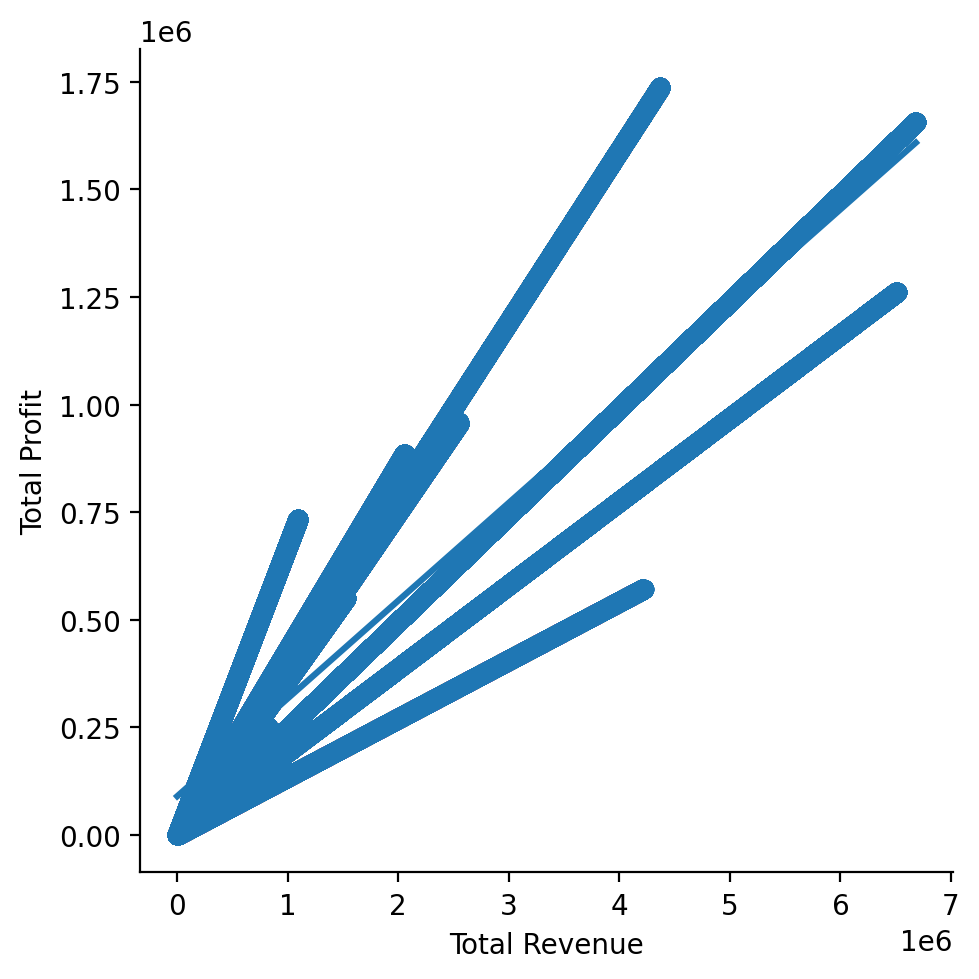

In [35]:
#เมื่อ Clean พวก Anomaly data แล้ว ลอง plot grap มาตรวจสอบอีกรอบ จะเห็นถึงความสัมพันธ์ของ 2 ตัวแปรที่ชัดเจนมากขึ้น
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data, ci= None)

In [36]:
#sum ข้อมูลทั้งหมด โดย sum Columns Total Profit
Total_Amount = data["Total Profit"].sum().round(2)
Total_Amount

588603226440.65

In [37]:
#Middel East มี Magin สูงสุด มี Profit เท่าไร
Middle_East_Amount = data["Total Profit"][data["Region"] == "Middle East and North Africa"].sum().round(2)
Middle_East_Amount

73093917891.11

In [38]:
#สร้างเป็นประโยค โดยใช้ "" ใส่คำพูด และเชื่อมคำด้วย + เช่น (จาก Code ใส่ str ไปเพื่อบอกว่า ข้อมูลตัวนี้คือ string หรือคำพูด เพราะถ้าไม่ใส่มันจะเป็นข้อมูลตัวเลขหรือ Numerical ซึ่งการบวกตัวเลขกับตัวอักษรมันจะ Error)
print("Middle East มี Total Profit : " + str(Middle_East_Amount) + " บาท คิดเป็น : " + str(((Middle_East_Amount/Total_Amount).round(2))*100)+ "% ของทั้งหมด")

Middle East มี Total Profit : 73093917891.11 บาท คิดเป็น : 12.0% ของทั้งหมด


In [39]:
data["Total Profit"][data["Country"] == "Iraq"].sum()

3159373979.71

In [40]:
# .count นี้เป็นการนับจำนวน
data["Total Profit"][data["Country"] == "Iraq"].count()

8086

In [41]:
# .max เป็นการดูค่าสูงสุด
data["Total Profit"][data["Country"] == "Iraq"].max()

1736961.3

In [42]:
# .min เป็นการดูค่าต่ำสุด
data["Total Profit"][data["Country"] == "Iraq"].min()

33.74

In [43]:
# .mean เป็นการดูค่าเฉลี่ย
data["Total Profit"][data["Country"] == "Iraq"].mean()

390721.49143086816

In [44]:
#ใส่ทศนิยม โดย .apply(lambda x : "{:,}".format(x))
data["Total Profit"][data["Country"] == "Iraq"].apply(lambda x : "{:,}".format(x)) #ใส่ทศนิยมให้เท่ๆ

268           87,058.44
740            7,348.09
741            7,348.09
1399         683,206.08
1400         683,206.08
               ...     
1498512    1,433,730.23
1498890       566,051.2
1499277       83,530.44
1499721      892,300.84
1499954      995,927.36
Name: Total Profit, Length: 8086, dtype: object

In [45]:
#Groupby เป็น Function หนึ่งที่ทำงานคล้าย Sumif และจะแสดงออกมาคล้ายๆ Pivot Table ดังตัวอย่างต่อไปนี้
data.groupby(["year","month","Item_Type","Order ID"]).sum()

Region  \
year month     Item_Type  Order ID                                          
2010 1.January Baby Food  101137149                 Australia and Oceania   
                          101335847                    Sub-Saharan Africa   
                          102081286                                  Asia   
                          102279984                 Australia and Oceania   
                          103224122                                  Asia   
...                                                                   ...   
2017 7.July    Vegetables 994640195                                  Asia   
                          995506656                                Europe   
                          995783030                                  Asia   
                          996804845  Sub-Saharan AfricaSub-Saharan Africa   
                          999913632                    Sub-Saharan Africa   

                                                Country Sales Channel  \
year month     Item_Type  Order ID                                      
2010 1.January Baby Food  101137149          East Timor        Online   
                          101335847              Rwanda        Online   
                          102081286            Cambodia       Offline   
                          102279984            Kiribati        Online   
                          103224122               India        Online   
...                                                 ...           ...   
2017 7.July    Vegetables 994640195           Sri Lanka        Online   
                          995506656             Ukraine        Online   
                          995783030              Taiwan       Offline   
                          996804845  SwazilandSwaziland  OnlineOnline   
                          999913632               Ghana       Offline   

                                    Order Priority         Order_Date  \
year month     Item_Type  Order ID                                      
2010 1.January Baby Food  101137149              H          1/10/2010   
                          101335847              H          1/29/2010   
                          102081286              C           1/5/2010   
                          102279984              H          1/25/2010   
                          103224122              C          1/20/2010   
...                                            ...                ...   
2017 7.July    Vegetables 994640195              M          7/10/2017   
                          995506656              C          7/15/2017   
                          995783030              M          7/24/2017   
                          996804845             LL  7/9/20177/10/2017   
                          999913632              L           7/5/2017   

                                              Ship Date  Units Sold  \
year month     Item_Type  Order ID                                    
2010 1.January Baby Food  101137149           1/27/2010        7585   
                          101335847            3/9/2010        6384   
                          102081286           1/22/2010        6976   
                          102279984            3/6/2010        5775   
                          103224122            3/1/2010        5166   
...                                                 ...         ...   
2017 7.July    Vegetables 994640195           8/28/2017        4992   
                          995506656            8/7/2017        1397   
                          995783030           8/14/2017        3182   
                          996804845  8/27/20178/28/2017       11120   
                          999913632           8/23/2017        5519   

                                     Unit Price  Unit Cost  Total Revenue  \
year month     Item_Type  Order ID                                          
2010 1.January Baby Food  101137149      255.28     159.42     1936298.80   
          

In [46]:
data.groupby(["month"])["Total Profit"].sum().round(2)

month
1.January      5.262556e+10
10.October     4.588399e+10
11.November    4.490212e+10
12.December    4.626535e+10
2.Febuary      4.782907e+10
3.March        5.281875e+10
4.April        5.113972e+10
5.May          5.280839e+10
6.June         5.111819e+10
7.July         5.240162e+10
8.August       4.610811e+10
9.September    4.470235e+10
Name: Total Profit, dtype: float64

In [47]:
#สามารถแยกดูเป็นรายตัวได้ ตัวอย่าง ต้องการดูแค่ Country และ Item Type โดยไป sum ที่ Total Profit
data.groupby(["Country","Item_Type"])["Total Profit"].sum()

Country      Item_Type      
Afghanistan  Baby Food          3.318292e+08
             Beverages          5.207576e+07
             Cereal             2.911936e+08
             Clothes            2.400776e+08
             Cosmetics          5.684838e+08
                                    ...     
Zimbabwe     Meat               1.907654e+08
             Office Supplies    4.377148e+08
             Personal Care      8.798709e+07
             Snacks             1.870779e+08
             Vegetables         2.121591e+08
Name: Total Profit, Length: 2220, dtype: float64

In [48]:
#ข้อมูลอาจดูยากเลยใช้ function round และ ใส่ , มาช่วย
data.groupby(["Country","Item_Type"])["Total Profit"].sum().round(2).apply(lambda x : "{:,}".format(x))

Country      Item_Type      
Afghanistan  Baby Food          331,829,167.72
             Beverages            52,075,764.0
             Cereal             291,193,646.79
             Clothes            240,077,636.64
             Cosmetics          568,483,787.17
                                     ...      
Zimbabwe     Meat                190,765,432.0
             Office Supplies     437,714,810.0
             Personal Care       87,987,088.42
             Snacks              187,077,889.2
             Vegetables          212,159,097.1
Name: Total Profit, Length: 2220, dtype: object

In [49]:
#Export ออกมาเป็น excel โดยใช้คำสั่ง to_excel ดังนี้
#1.อันดับแรก ตั้งชื่อตัวแปรว่า export ก่อนจะได้ไม่ต้องพิมพ์ Code ใหม่ทั้งหมด
export = data.groupby(["Country","Item_Type"])["Total Profit"].sum().round(2).apply(lambda x : "{:,}".format(x))
#2.เริ่ม Export โดยใช้ Function to_excel

export.to_excel("file.xlsx") #ตั้งชื่อว่า export คือ data ที่จะเอาไปลง Excel ส่วน file คือชื่อที่ตั้ง

Data Visulization

<Axes: xlabel='Total Revenue', ylabel='Total Profit'>

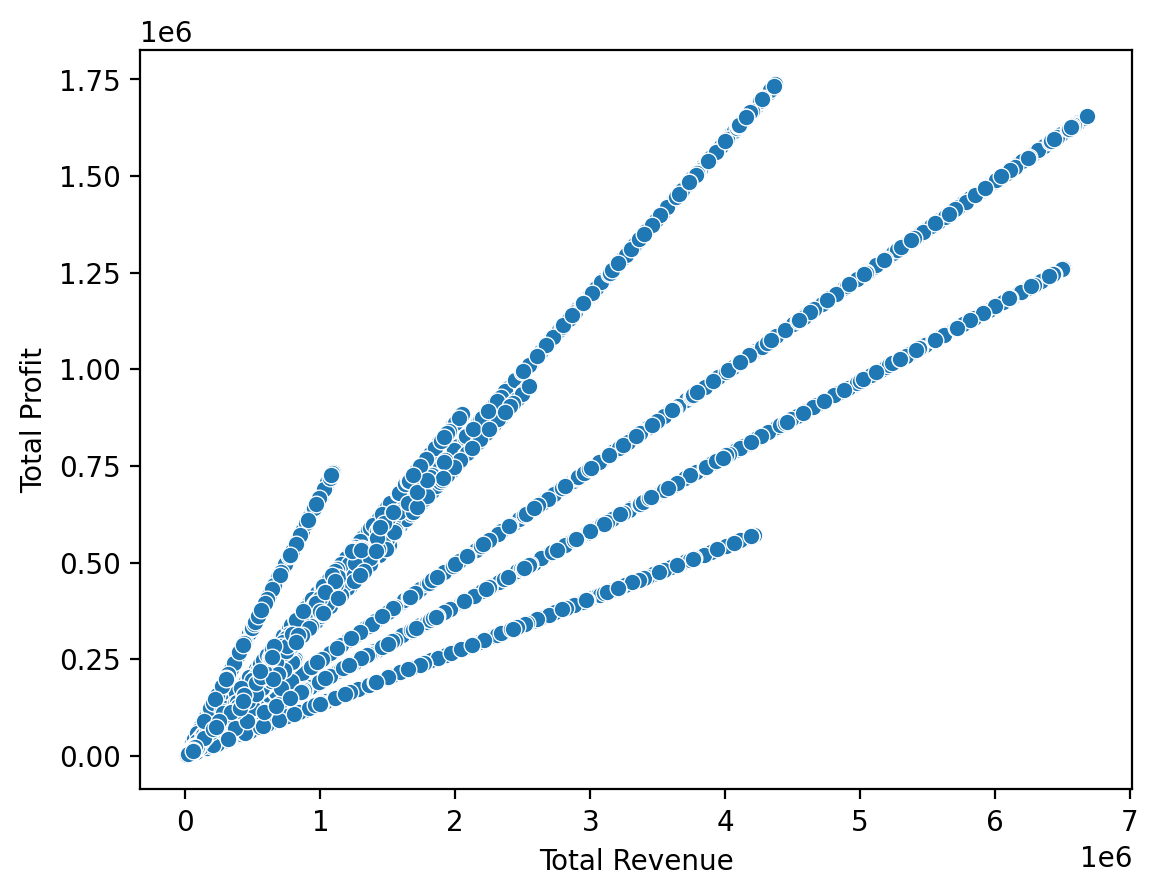

In [50]:
#ใช้ scatter plot ในการดูการกระจายของข้อมูล และความสัมพันธ์ของข้อมูล ซึ่งจากภาพจะเห็นว่าข้อมูลค่อนข้างสัมพันธ์กัน พูดง่ายๆคือ ถ้า X หรือ Revenue มาก y หรือ Profit จะมากตามนั่นเอง
sns.scatterplot(x = "Total Revenue", y = "Total Profit", data = data)

In [51]:
#set size all line graph
sns.set(rc={"figure.figsize": (15,5)})

<Axes: xlabel='month', ylabel='Total Profit'>

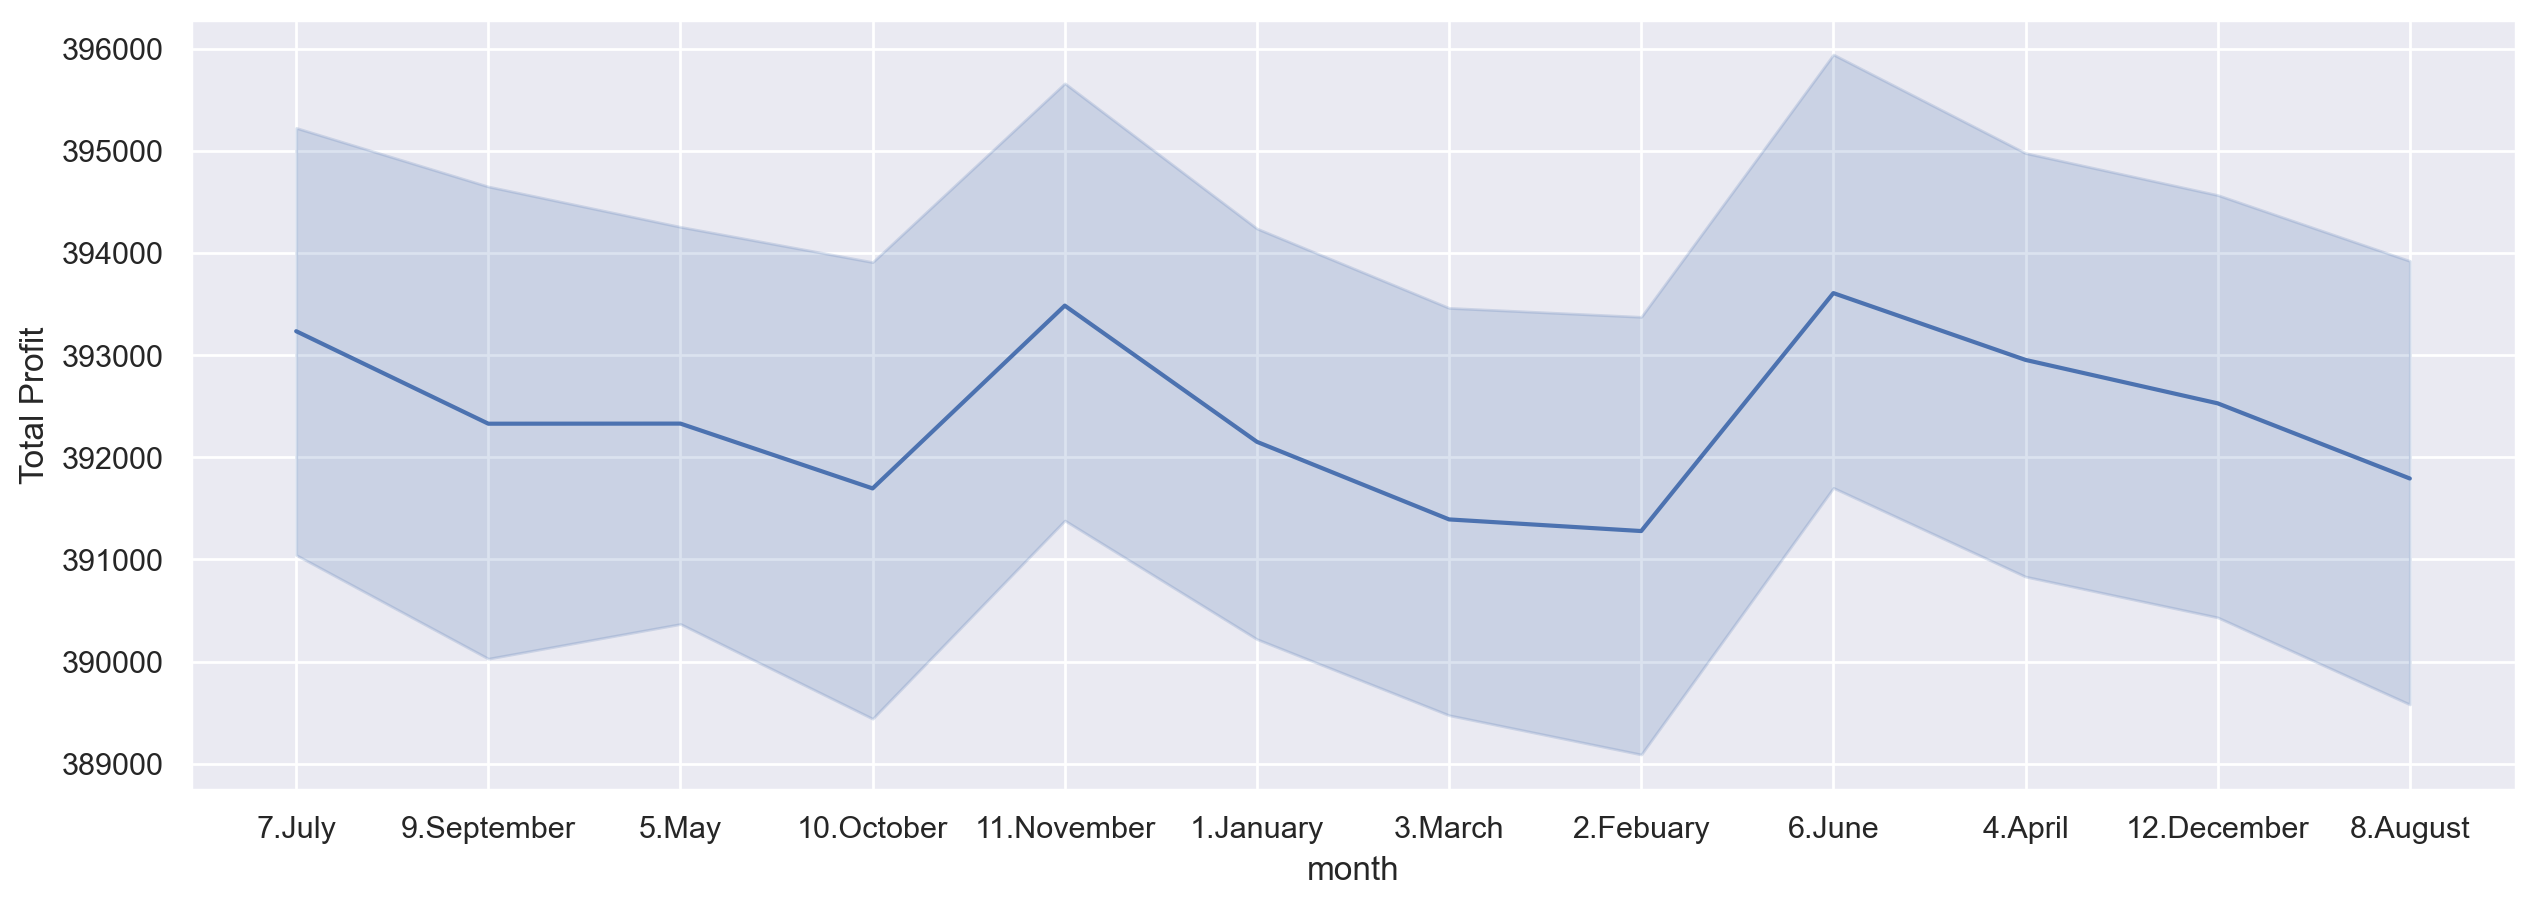

In [52]:
#การใช้ Line plot ส่วนใหญ่จะเป็นการใช้เพื่อดูแนวโน้ม ตัวอย่างนี้ดูแนวโน้มการเคลื่อนไหวของ Profit ในแต่ละเดือน
sns.lineplot(x = "month", y = "Total Profit", data = data)

<Axes: xlabel='month', ylabel='Total Profit'>

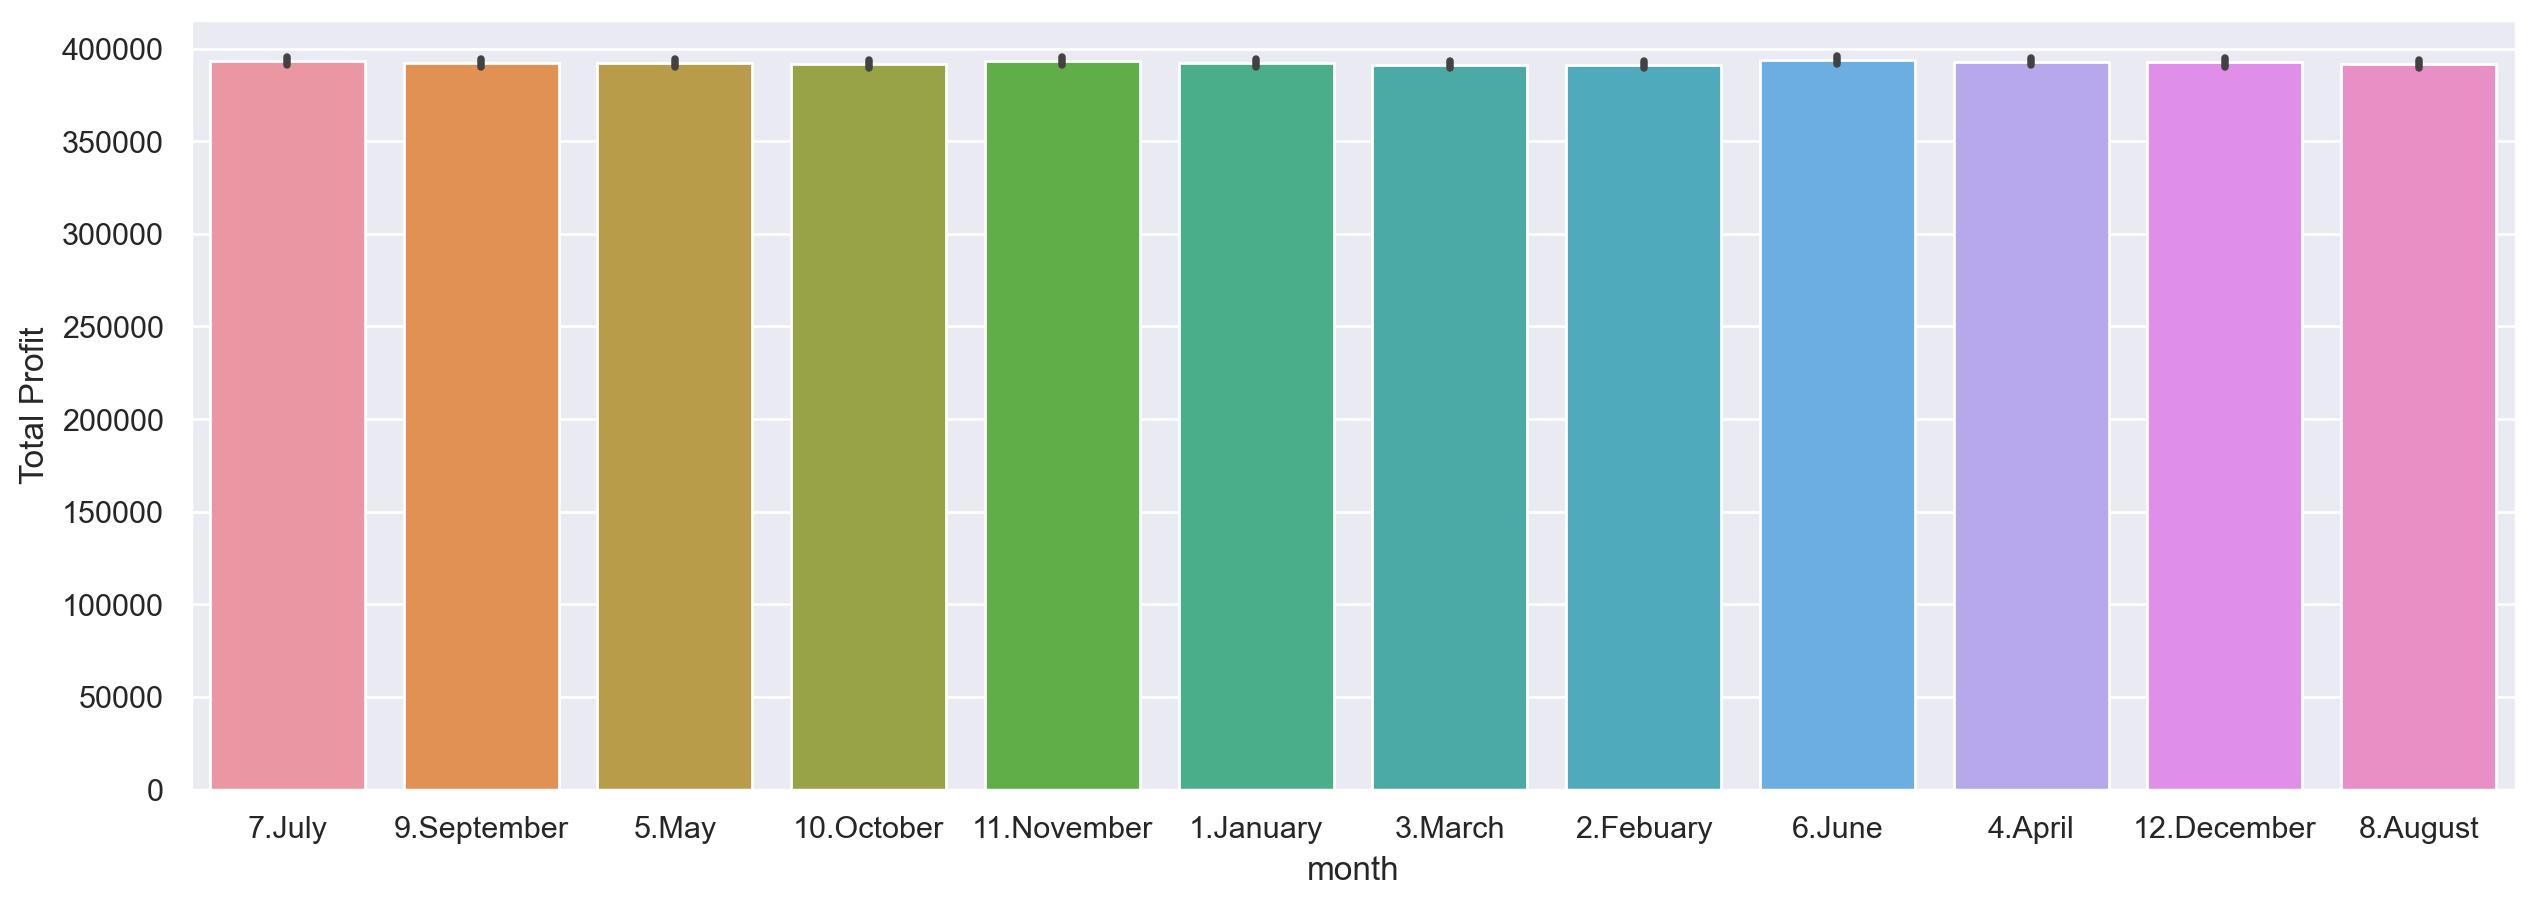

In [53]:
#การใช้ Bar plot ส่วนใหญ่จะเป็นการใช้เพื่อดูเพื่อเปรียบเทียบ ตัวอย่างนี้ผมจะดู Profit ในแต่ละเดือนเทียบกัน
sns.barplot(x = "month", y = "Total Profit", data = data)

<Axes: xlabel='year', ylabel='%margin'>

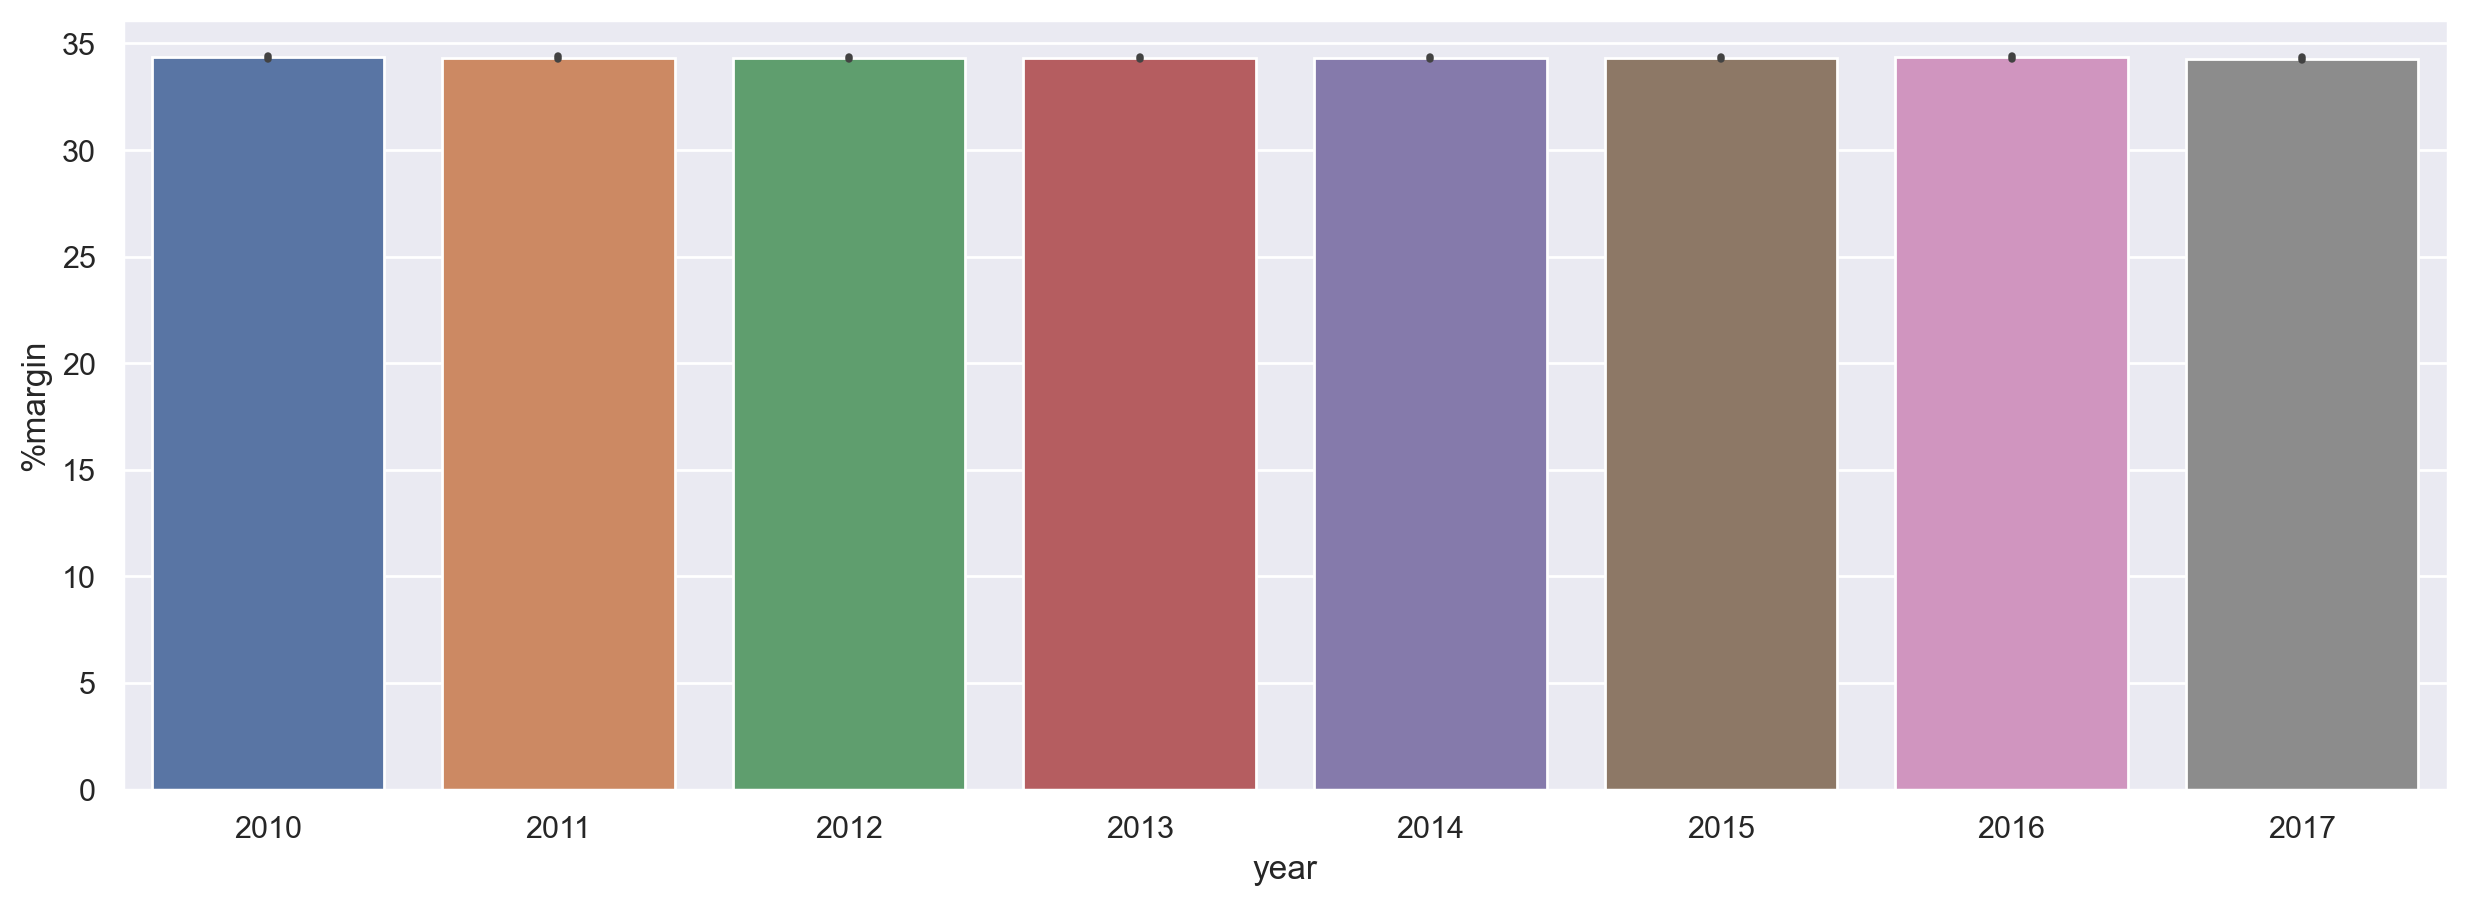

In [54]:
sns.barplot(x = "year", y = "%margin", data = data)

<Axes: xlabel='year', ylabel='%margin'>

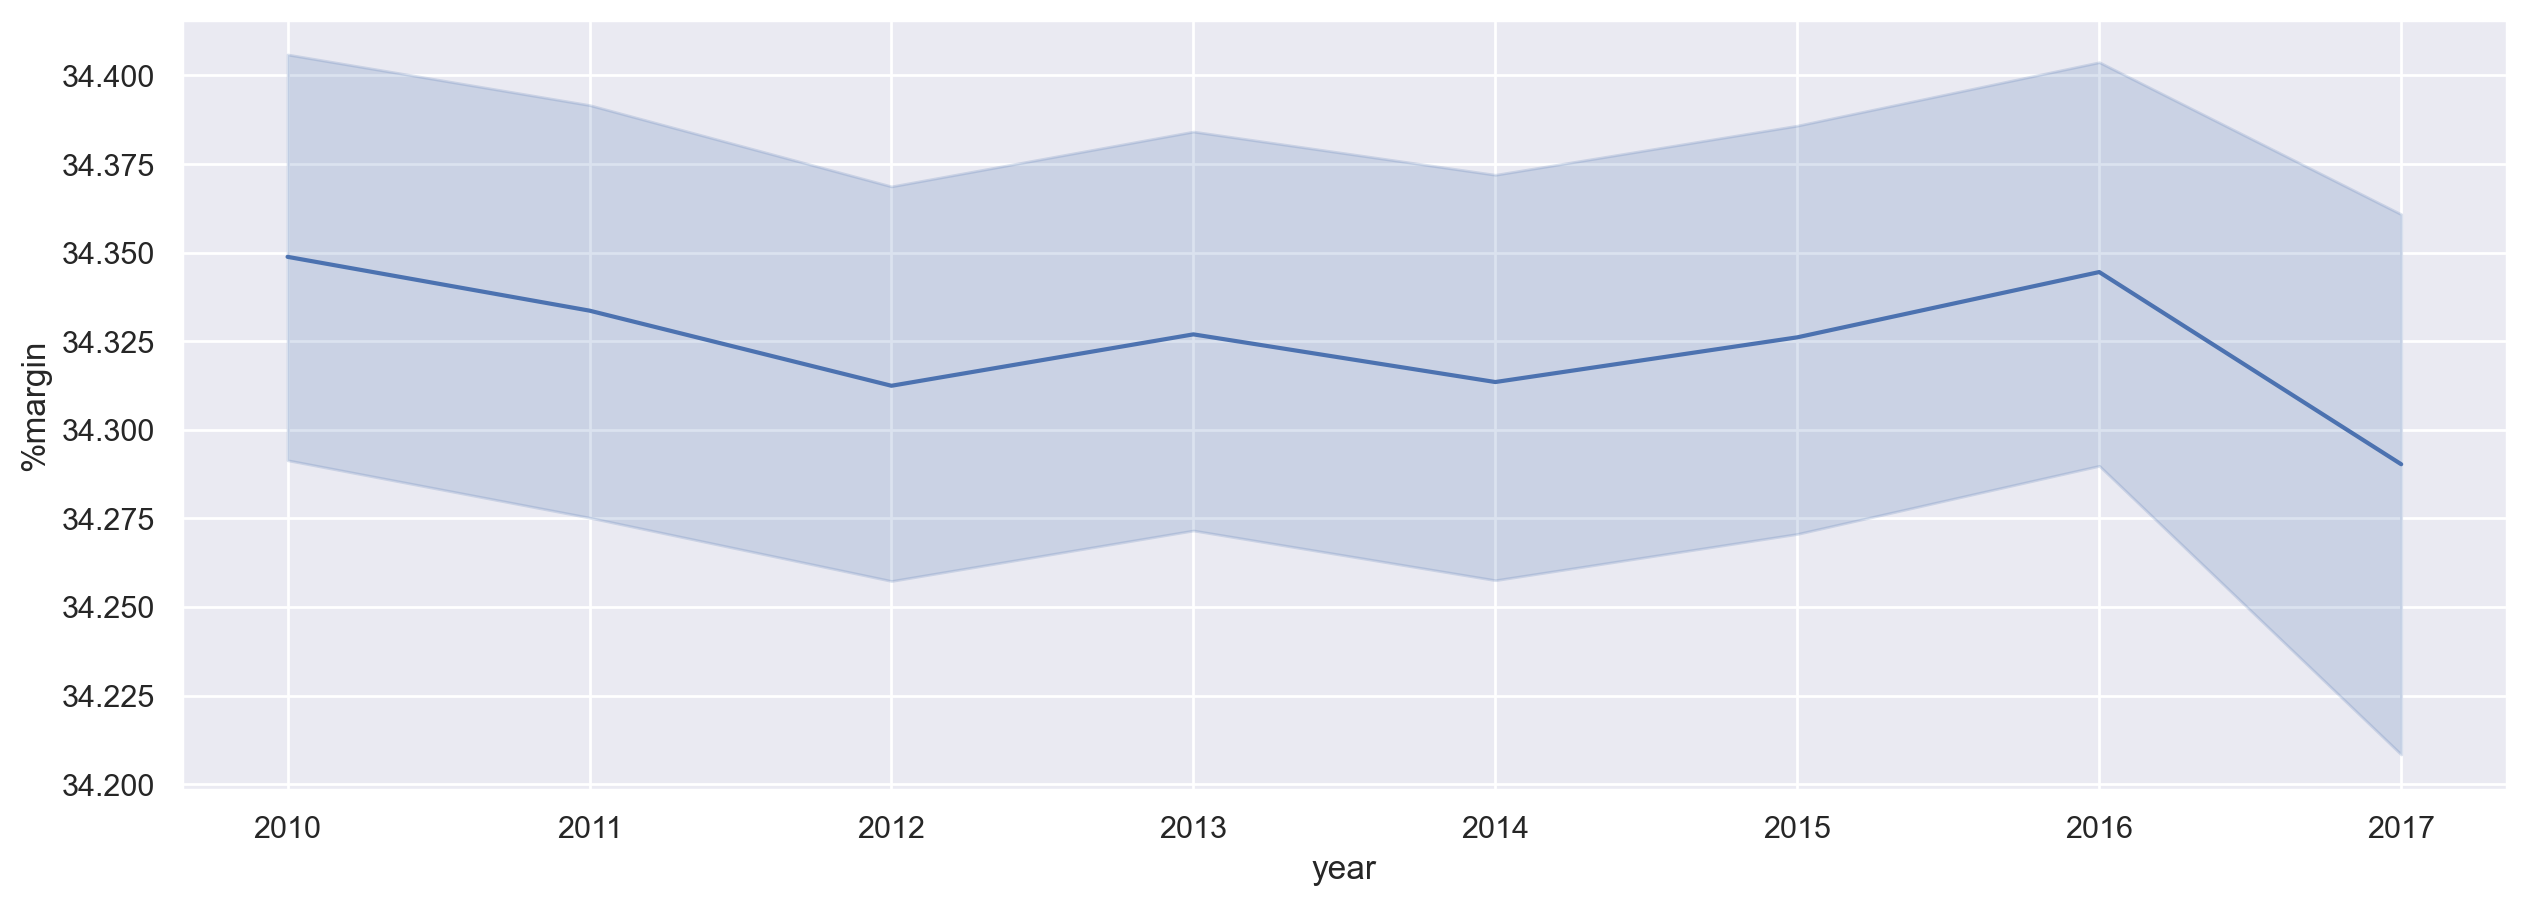

In [55]:
sns.lineplot(x = "year", y = "%margin", data = data)

<Axes: xlabel='year', ylabel='%margin'>

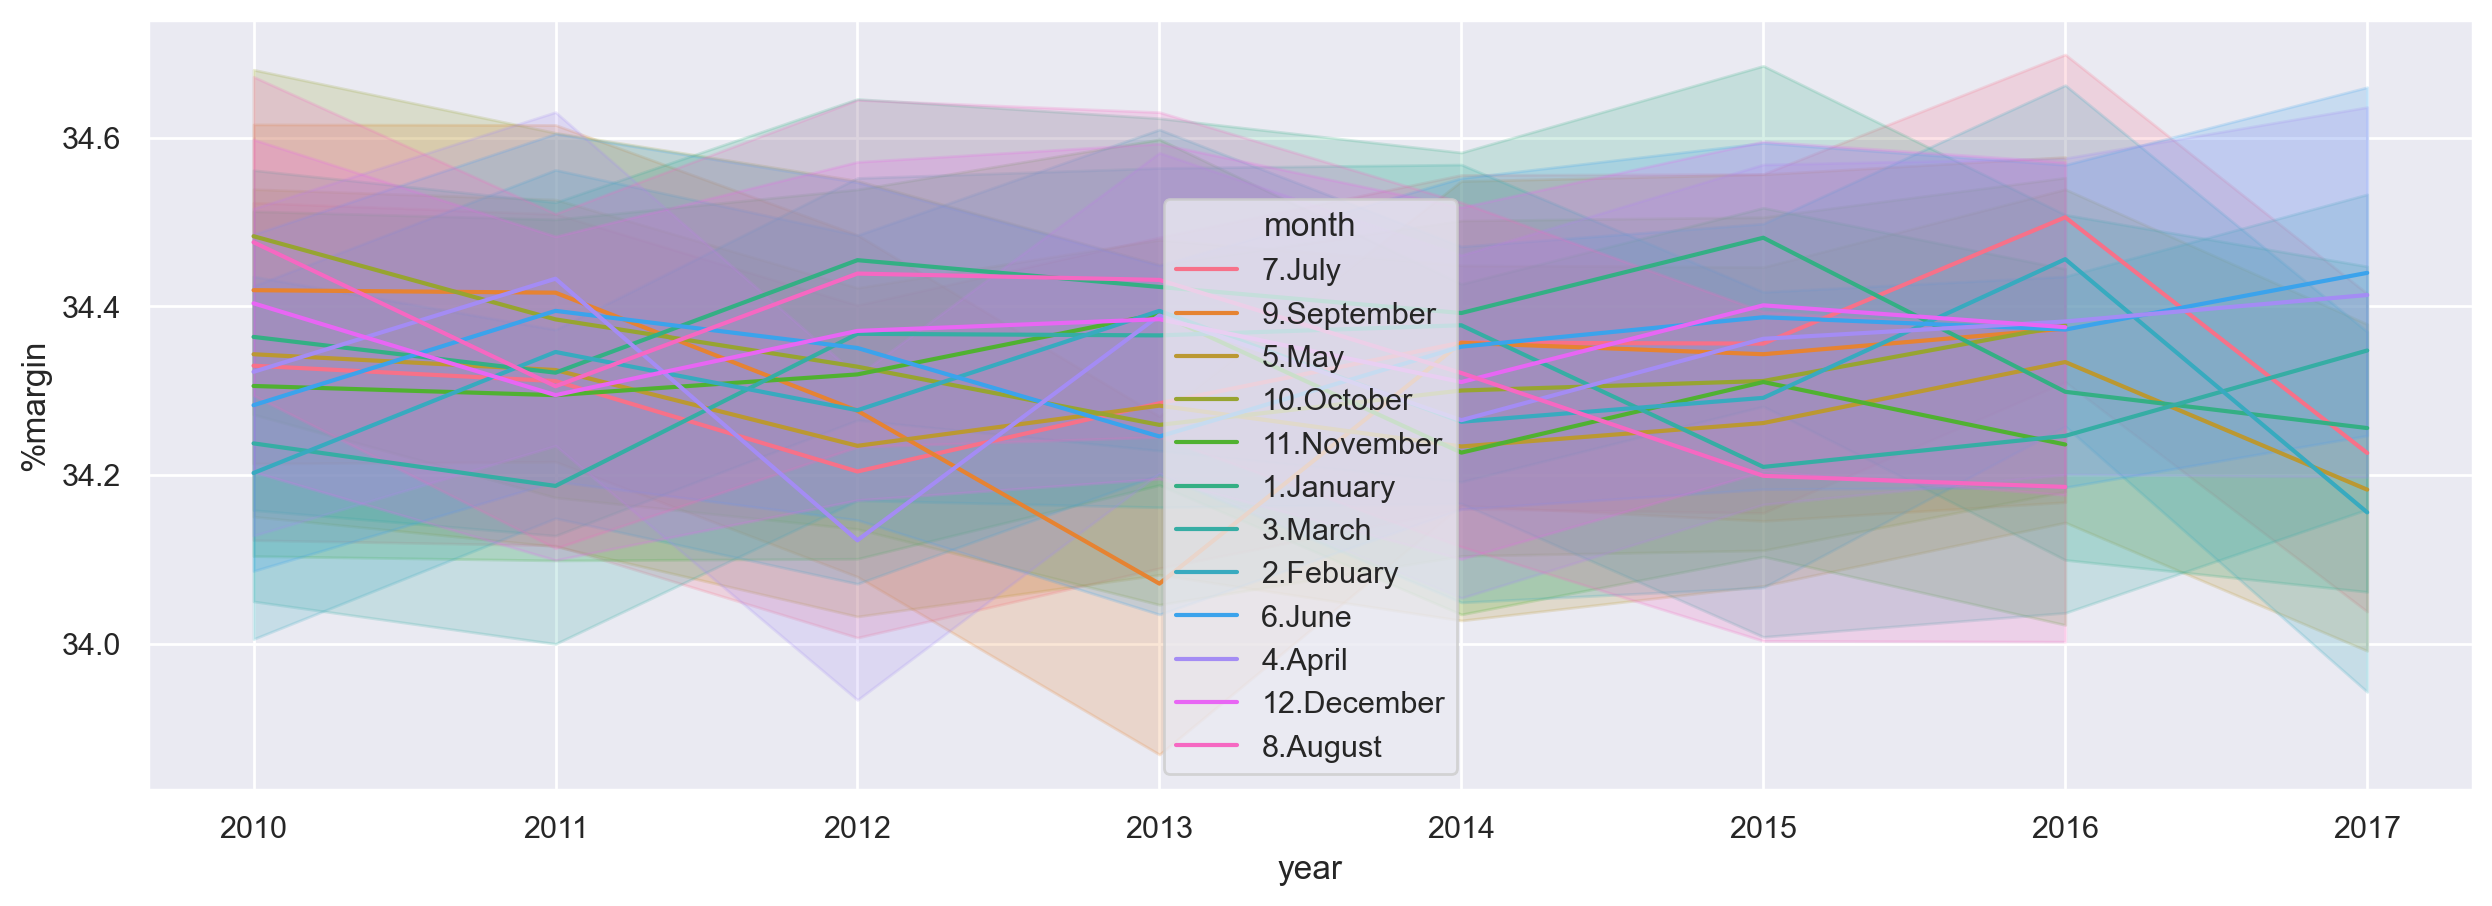

In [56]:
sns.lineplot(x = "year", y = "%margin", hue =  "month",data = data)

<Axes: xlabel='year', ylabel='Total Profit'>

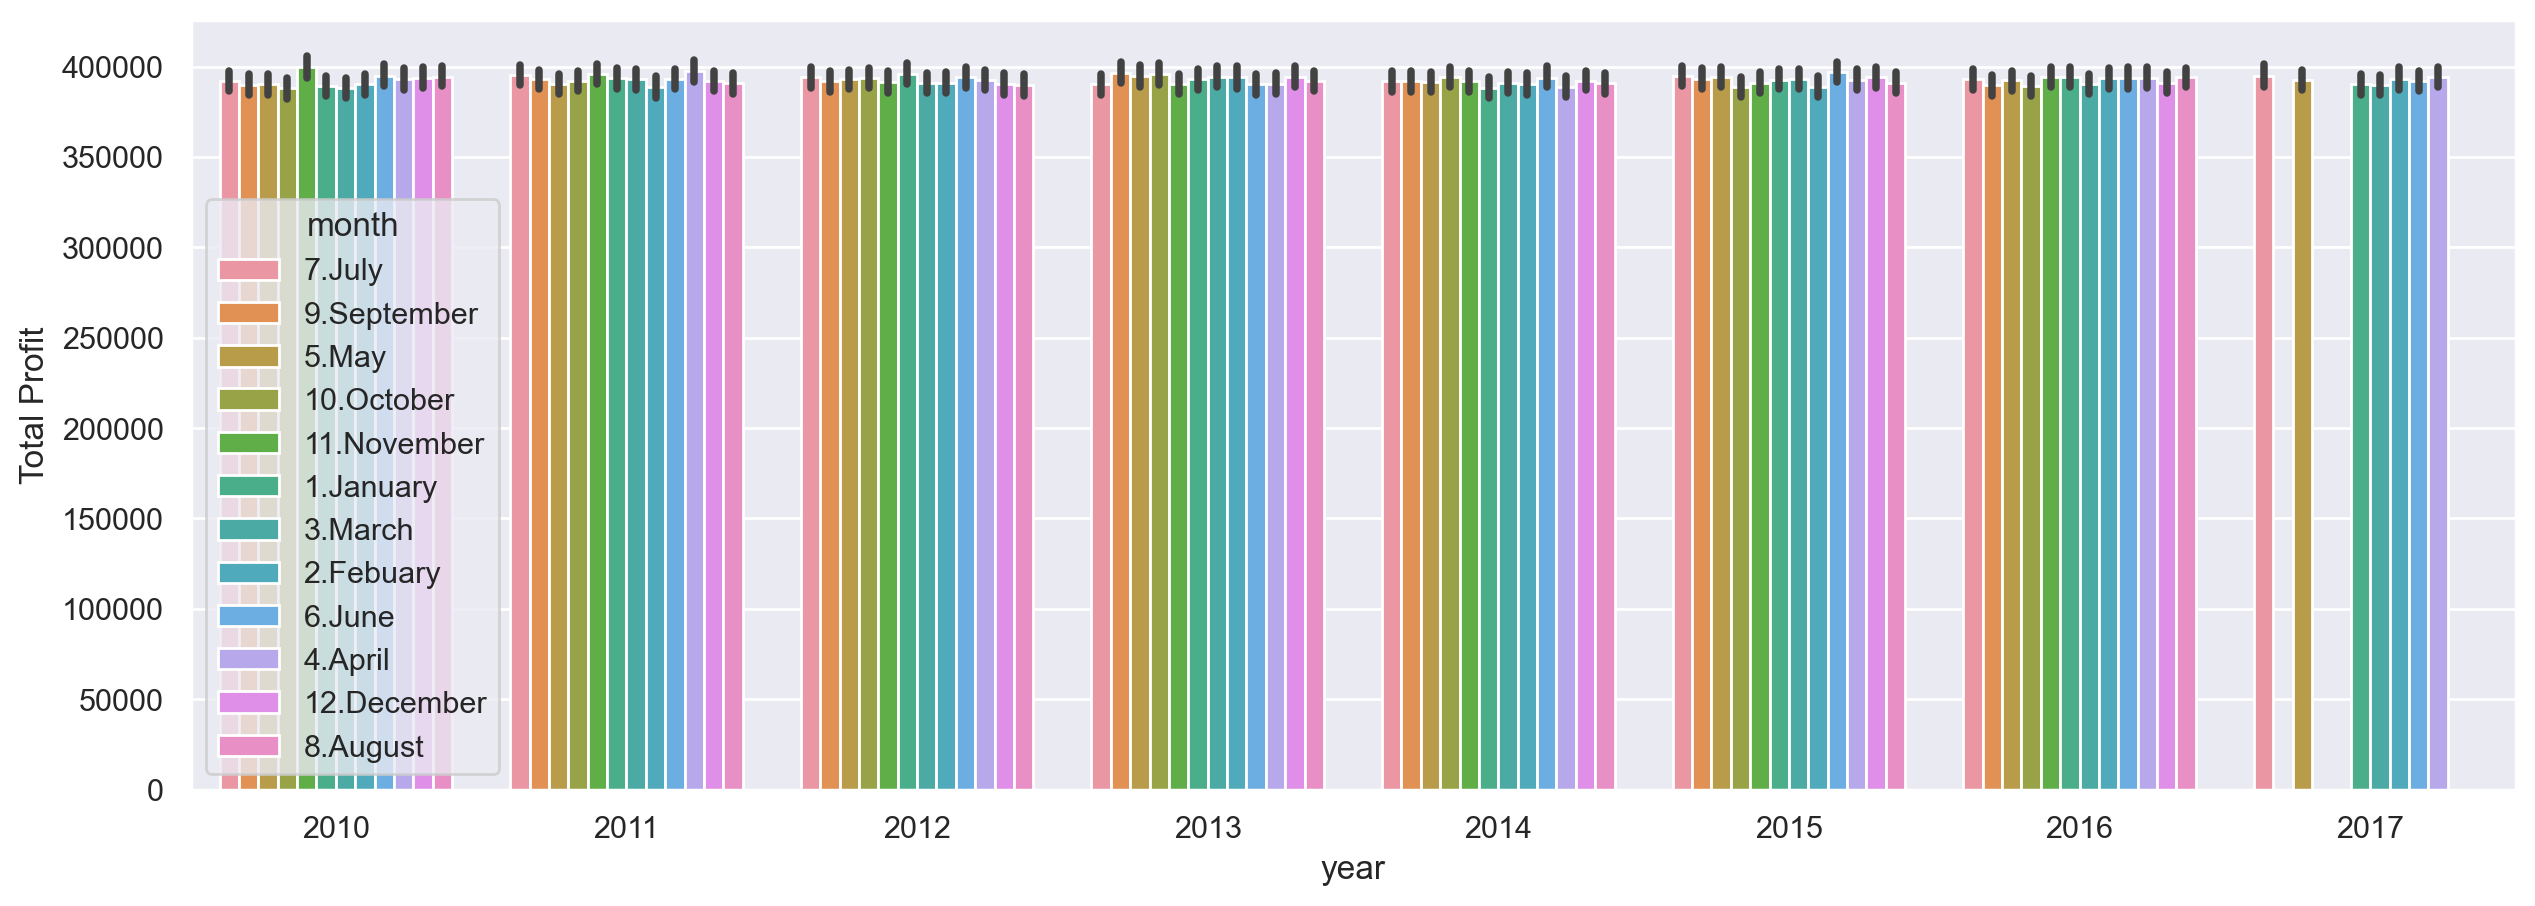

In [57]:
sns.barplot(x = "year", y = "Total Profit", hue = "month",data = data)

In [58]:
#สร้างตัวแปรที่ชื่อ margin_top10
margin_top10 = data.sort_values("%margin", ascending = False).head(10)
margin_top10

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.2,good,2014,2.Febuary
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2.Febuary
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.2,good,2010,3.March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.2,good,2013,6.June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.2,good,2011,7.July
780931,Asia,Vietnam,Clothes,Offline,H,2/28/2013,621288716,4/2/2013,1992,109.28,35.84,217685.76,71393.28,146292.48,67.2,good,2013,2.Febuary
1155015,Sub-Saharan Africa,Mali,Clothes,Offline,H,12/13/2015,175936019,1/23/2016,2233,109.28,35.84,244022.24,80030.72,163991.52,67.2,good,2015,12.December
108725,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2.Febuary
1406423,Sub-Saharan Africa,Comoros,Clothes,Offline,C,11/28/2010,882583510,12/2/2010,4929,109.28,35.84,538641.12,176655.36,361985.76,67.2,good,2010,11.November
1043226,Europe,Montenegro,Clothes,Offline,L,5/13/2011,102287709,5/25/2011,8061,109.28,35.84,880906.08,288906.24,591999.84,67.2,good,2011,5.May


<Axes: xlabel='Country', ylabel='Total Revenue'>

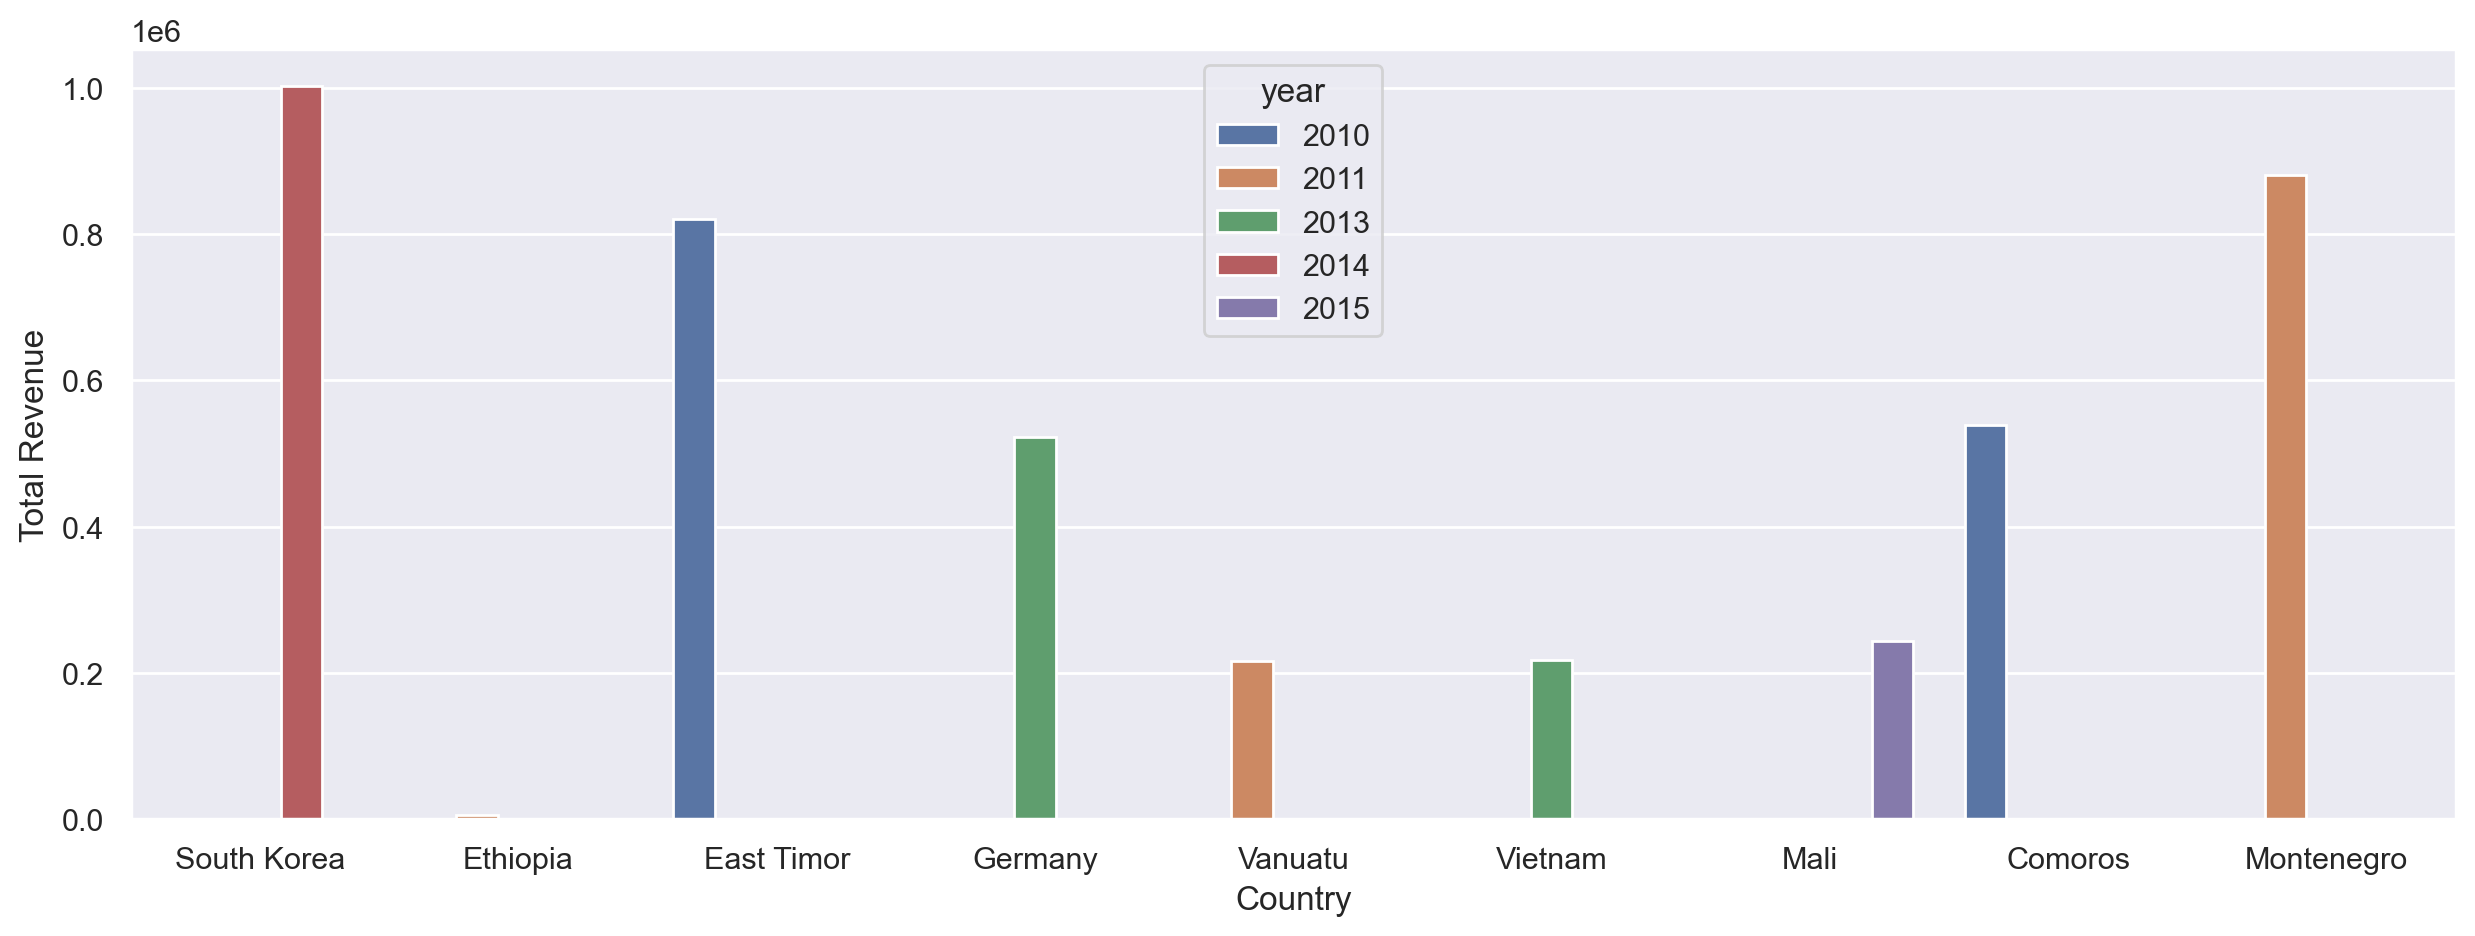

In [59]:
sns.barplot(x = "Country", y = "Total Revenue",hue = "year",data = margin_top10)

In [60]:
margin_top10["Total Revenue"]

1087185    1002316.16
108726        5901.12
1155029     821129.92
402045      522467.68
402047      217030.08
780931      217685.76
1155015     244022.24
108725        5901.12
1406423     538641.12
1043226     880906.08
Name: Total Revenue, dtype: float64

([<matplotlib.patches.Wedge at 0x384577950>,
 [Text(-0.7142252708357255, 0.8365896619607697, 'Asia'),
  Text(-1.087096467668054, 0.1679918747548222, 'Sub-Saharan Africa'),
  Text(-0.9999733794814301, -0.4583156557750216, 'Australia and Oceania'),
  Text(-0.2118141534257815, -1.0794140838475843, 'Europe'),
  Text(0.35394443536457754, -1.0415005216870756, 'Australia and Oceania'),
  Text(0.6516815109194248, -0.8861778649491171, 'Asia'),
  Text(0.9008564855863037, -0.6312349739812377, 'Sub-Saharan Africa'),
  Text(0.9975584450996502, -0.46354843178503846, 'Sub-Saharan Africa'),
  Text(1.0985652110110093, -0.056164732317856736, 'Sub-Saharan Africa'),
  Text(0.6400882575358631, 0.8945876271024001, 'Europe')],
 [Text(-0.38957742045585025, 0.4563216337967834, '22.5%'),
  Text(-0.5929617096371202, 0.09163193168444846, '0.1%'),
  Text(-0.5454400251716891, -0.2499903576954663, '18.4%'),
  Text(-0.11553499277769899, -0.5887713184623186, '11.7%'),
  Text(0.19306060110795137, -0.5680911936474957, '

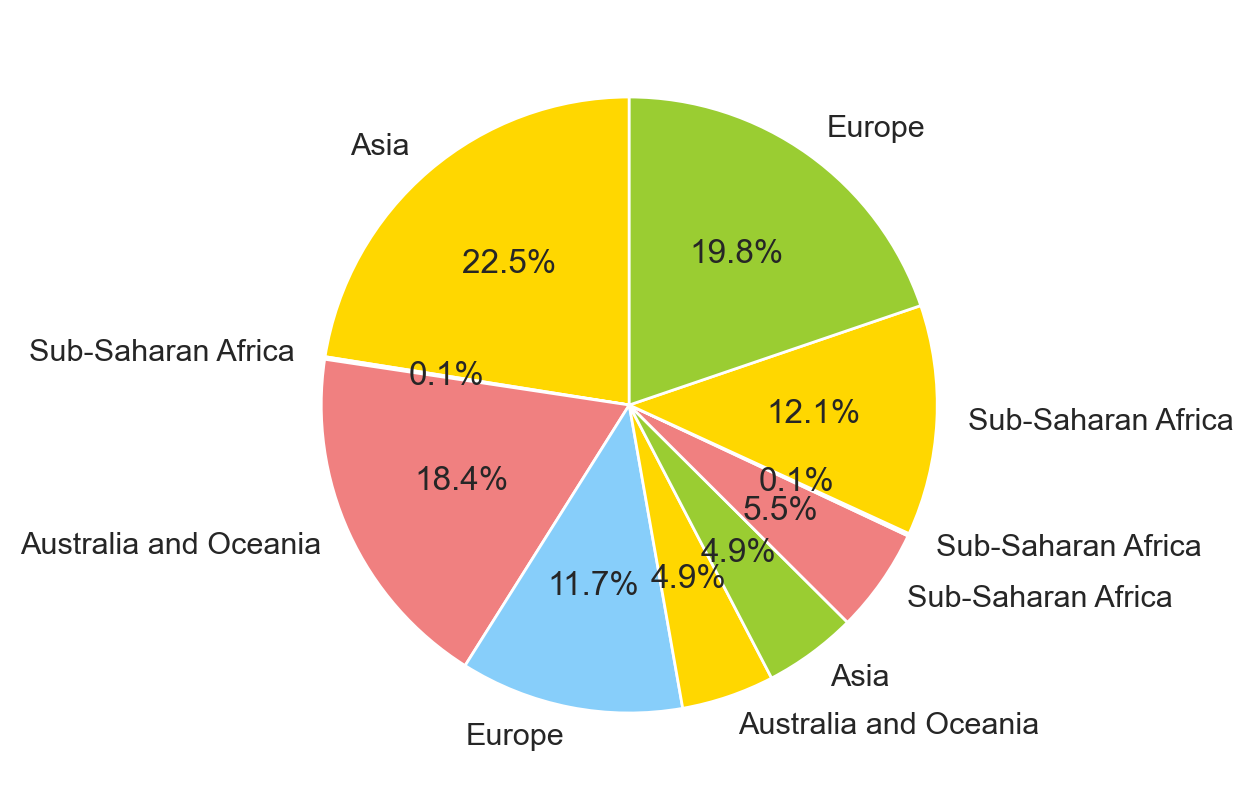

In [61]:
#set color for pic chart
color = ["gold", "yellowgreen", "lightcoral", "lightskyblue"]

#Labels คือข้อมูลที่จะให้โชว์ คือ "Region"
plt.pie(margin_top10["Total Revenue"], labels=margin_top10["Region"], colors=color, startangle=90, autopct='%1.1f%%')

Beginning : Machine Learning For bussiness
มาทำ Prediction ด้วย Linear regression

In [62]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
#กำหนด model
model = LinearRegression()
model

LinearRegression()

In [64]:
#x เรียกว่า dependent y คือ independaent และที่ใช้ [[]] เพราะจะทำเป็น 2D Array
X = data[['Total Revenue','Total Cost']]
y = data['%margin'] #หรือ data.%margin ที่ไม่ใช้เพราะมันติด % นั่นเอง

In [65]:
model.fit(X,y)

LinearRegression()

In [66]:
#ค่า R-square คือยิ่งมากยิ่งดี แต่ที่ได้นี่
model.score(X,y)

0.5312463604621267

In [67]:
model.coef_ #หรือที่เรียกว่า slope

array([ 3.38013701e-05, -4.75858163e-05])

In [68]:
model.intercept_

33.9855343146632

In [69]:
#เขียนสมการทำนายได้ดังนี้ เช่นถ้าอยากทำนาย x = 50000,20000

#หรือพูดเป็นภาษาธุรกิจคือ ถ้ามีรายได้ 50,000 ,Cost 20,000 จะได้ค่า %margin จะเป็นเท่าไรนั่นเอง

model.intercept_ + (-3.38013701e-05* 50000)+(-4.75858163e-05*20000)

31.3437494836632

In [70]:
model.predict([[50000,20000]])

/Users/kridsadee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.72388649])

In [71]:
#ถ้าอยากทำนาย 2 ตัวแปร
model.predict([[50000,20000],[70000,60000]])

/Users/kridsadee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.72388649, 33.49648124])

In [72]:
#ต่อมา Predict จากข้อมูล
y_pred = model.predict(data[["Total Revenue","Total Cost"]]) #อันนี้เอา Columns Total มา Predict เลย
y_pred

array([33.9633485 , 33.9633485 , 43.15376114, ..., 36.77049709,
       39.81259888, 34.41462739])

In [73]:
#สร้าง Columns ใหม่ชื่อว่า y_act คือค่า Actual เพื่อจะเอามาเทียบกับตัว Model ที่ทำไว้
y_act = data[["%margin"]]

In [74]:
#เช็ค Mean Square error
mean_squared_error(y_act, y_pred)

81.06723897830501

In [75]:
#เช็ค Root Mean Square error แปลว่า ข้อมูล Error +- ไปถึง9.00 เช่น Actual 10 Model ไปทำนาย 1 หรือ 19 เป็นต้น
mean_squared_error(y_act, y_pred) **0.5  

9.003734723896802

In [76]:
#เอา Model มาใส่ จะได้ดังนี้
data["model"] = model.predict(data[["Total Revenue","Total Cost"]])
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,dicision,year,month,model
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7.July,33.963348
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7.July,33.963348
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9.September,43.153761
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9.September,43.153761
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bad,2015,5.May,32.871834


In [77]:
#ตัวอย่างข้อมูล 1000 ตัวอย่างแบบเรียงจากมากไปน้อย
margin_top1000_model = data.sort_values("%margin", ascending = False).head(1000)

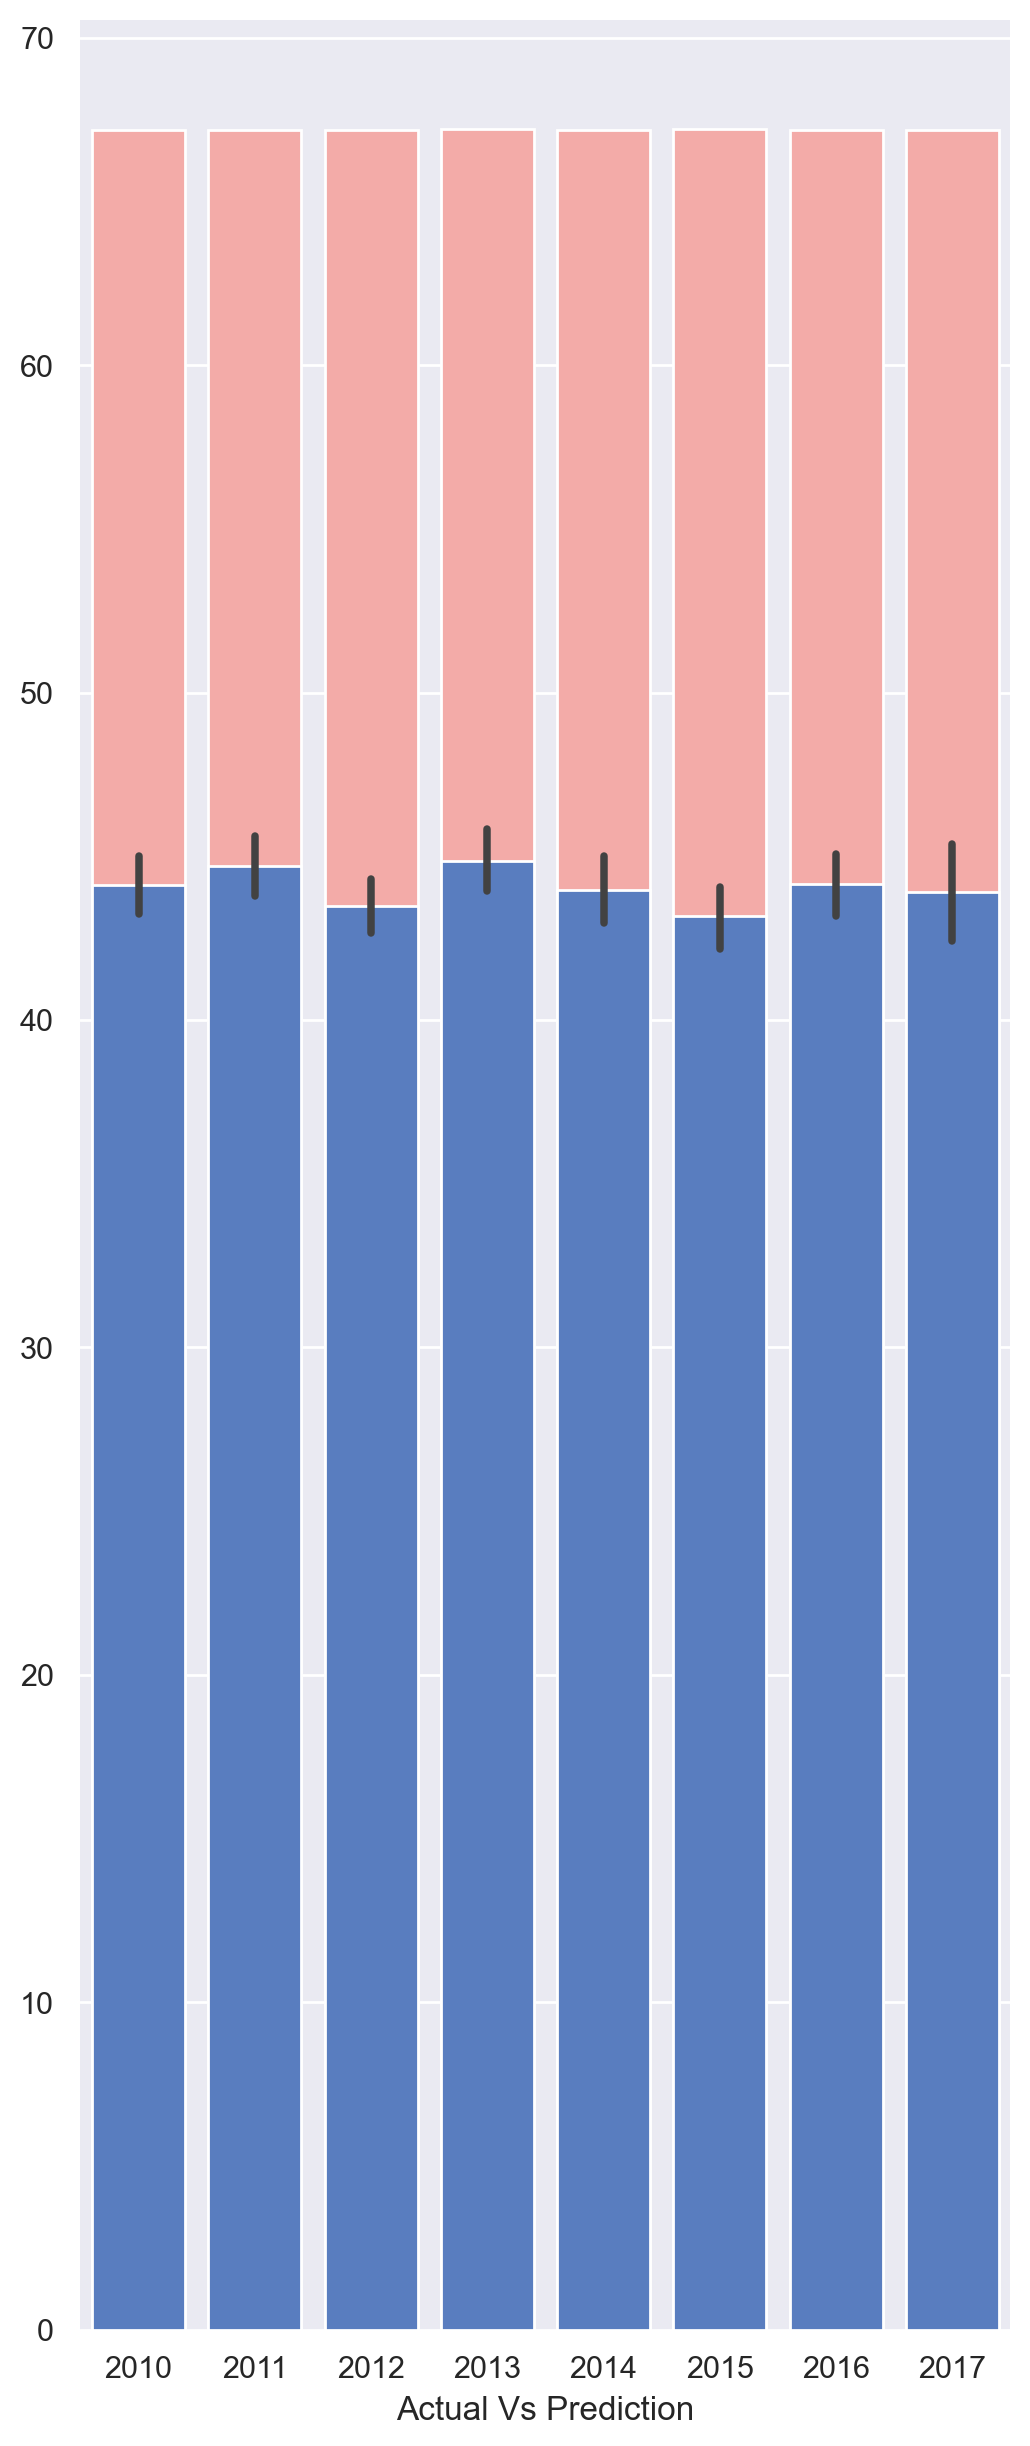

In [78]:
# Plot 2 กราฟคือ Model vs Actual ซึ่งสีพาสเทลคือ Actual และ Prediction คือ สีทึบ
f, ax = plt.subplots(figsize=(6, 15))
#Graph แรก Actual
sns.set_color_codes("pastel")
sns.barplot(x="year", y="%margin", data=margin_top1000_model,
            label="Actual", color="r")

#Graph สอง Model ที่ทำนายได้
sns.set_color_codes("muted")
sns.barplot(x="year", y="model", data=margin_top1000_model,
            label="Prediction", color="b")

# Add a legend and informative axis label
ax.set(ylabel="",
       xlabel="Actual Vs Prediction")
sns.despine(left=True, bottom=True)